In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/data.csv')

In [3]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [6]:
df['Popularity'].unique()

array([3916, 3105,  819,  617, 1013, 2009,  870,  586,  436, 2774,  113,
       2031,  416,   67,  210, 1715,  376,  549, 1439,  535, 2202,   26,
        481, 5657, 1624, 1720,  520, 1385, 1851, 1158,   61,  640,  873,
          2,  155,  204,   86,  238,  454,  259,  258,  613,  190,  105,
         21,  130, 1391,  820])

In [7]:
df_selected = df.drop(columns = ['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'])

In [9]:
df_selected.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [10]:
df_selected = df_selected.rename(columns = {'Engine HP': 'HP',
                                            'Engine Cylinders':'Cylinders',
                                            'Transmission Type':'Transmission',
                                            'Driven_Wheels':'Drive Mode',
                                            'highway MPG':'MPG-H',
                                            'city mpg':'MPG-C',
                                            'MSRP':'Price'})

In [11]:
df_selected.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [12]:
df.shape

(11914, 16)

In [13]:
df_selected.shape

(11914, 10)

In [15]:
duplicated_rows = df_selected[df_selected.duplicated()]

print('number of duplicated rows: ', duplicated_rows.shape[0])

number of duplicated rows:  989


In [21]:
df_selected.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [17]:
df_dropped = df_selected.drop_duplicates()

In [18]:
df_dropped.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

In [19]:
df_dropped.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [22]:
df_dropped.isnull().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64

In [31]:
df_dropped[df_dropped['HP'].isnull()]['Make'].nunique()

10

In [28]:
df_dropped[(df_dropped['Make'] == 'FIAT') & (df_dropped['Model'] == '500e')]

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
539,FIAT,500e,2015,118.0,0.0,DIRECT_DRIVE,front wheel drive,108,122,31800
540,FIAT,500e,2016,118.0,0.0,DIRECT_DRIVE,front wheel drive,103,121,31800
541,FIAT,500e,2017,118.0,0.0,DIRECT_DRIVE,front wheel drive,103,121,31800


In [27]:
df_dropped.loc[(df_dropped['Make'] == 'FIAT') & (df_dropped['Model'] == '500e'), 'HP'] = 118

In [29]:
df_dropped[(df_dropped['Make'] == 'FIAT') & (df_dropped['Model'] == '500e')]

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
539,FIAT,500e,2015,118.0,0.0,DIRECT_DRIVE,front wheel drive,108,122,31800
540,FIAT,500e,2016,118.0,0.0,DIRECT_DRIVE,front wheel drive,103,121,31800
541,FIAT,500e,2017,118.0,0.0,DIRECT_DRIVE,front wheel drive,103,121,31800


In [32]:
df_dropped.dropna(inplace = True)

<ipython-input-32-de6f524c40c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped.dropna(inplace = True)


In [33]:
df_dropped.isnull().sum()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64

In [34]:
###Outliers

<Axes: xlabel='Price'>

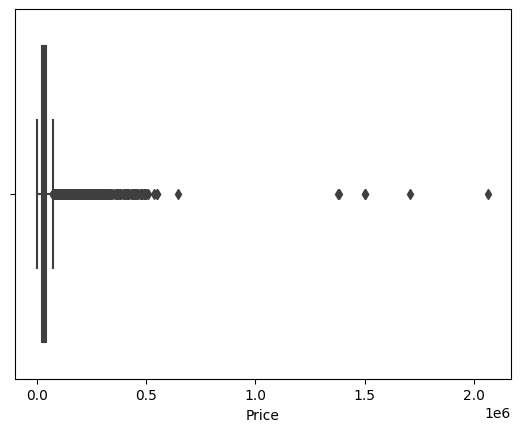

In [35]:
sns.boxplot(x = df_dropped['Price'])

<Axes: xlabel='HP'>

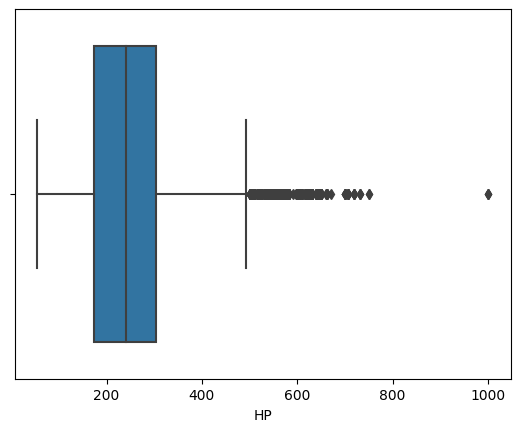

In [38]:
sns.boxplot(x = df_dropped['HP'])

In [40]:
df_dropped[df_dropped['HP'] ==df_dropped['HP'].max() ]

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
11362,Bugatti,Veyron 16.4,2008,1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,14,8,2065902
11363,Bugatti,Veyron 16.4,2008,1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,14,8,1500000
11364,Bugatti,Veyron 16.4,2009,1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,14,8,1705769


In [41]:
###Histograms

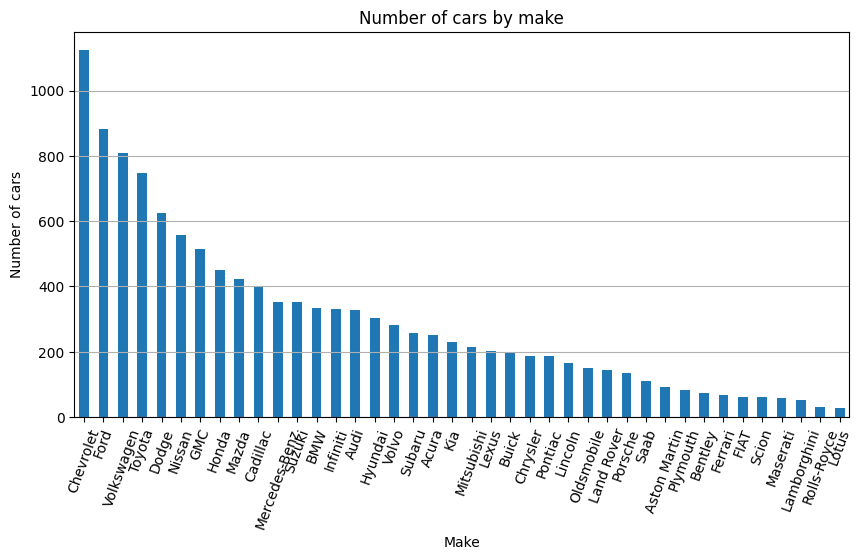

In [45]:
df['Make'].value_counts().nlargest(40).plot(kind = 'bar', figsize = (10,5))

plt.title('Number of cars by make')
plt.ylabel('Number of cars')
plt.xlabel('Make')
plt.xticks(rotation = 70)
plt.grid(axis = 'y')
plt.show()

<ipython-input-46-a9fdc440d90e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df_dropped.corr()


,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.314630,-0.051168,0.282075,0.229817,0.196738
HP,0.314630,1.000000,0.787817,-0.417522,-0.463829,0.659751
Cylinders,-0.051168,0.787817,1.000000,-0.610832,-0.625081,0.554096
MPG-H,0.282075,-0.417522,-0.610832,1.000000,0.845388,-0.206547
MPG-C,0.229817,-0.463829,-0.625081,0.845388,1.000000,-0.227468
Price,0.196738,0.659751,0.554096,-0.206547,-0.227468,1.000000


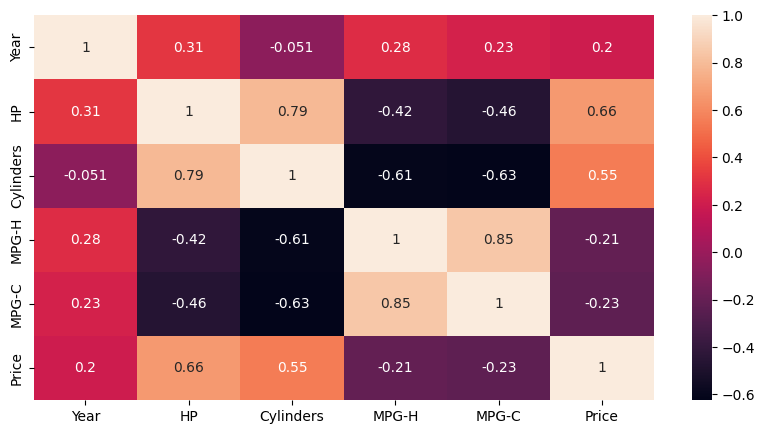

In [46]:
plt.figure(figsize = (10,5))

c = df_dropped.corr()
sns.heatmap(c, annot = True)

c

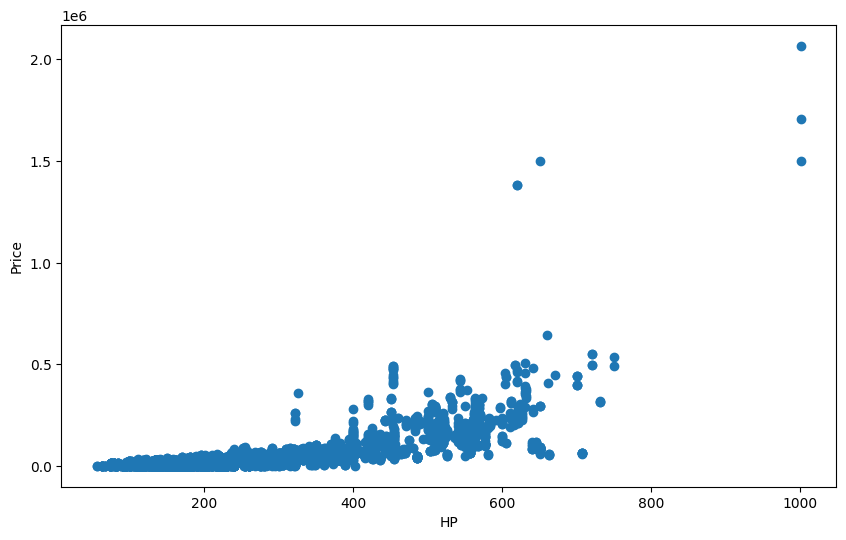

In [47]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.scatter(df_dropped['HP'], df_dropped['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()